In [1]:
#Indian Kids Screentime 2025 Dataset for Analysis and Visualization

#In this notebook, we're going to analyse Kids Screentime Dataset from Kaggle.This Dataset contain 9712 Indian children aged 8 to 18 years,It combines urban and rural demographics, reflecting differences in device access, screen habits, and health outcomes.

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
kids = pd.read_csv("Indian_Kids_Screen_Time.csv")
kids.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [3]:
kids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [4]:
kids.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [5]:
kids.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [6]:
#From above, we see that the dataset is missing a lot of information in for the Health_Impacts column.

kids.shape

(9712, 8)

In [7]:
kids.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

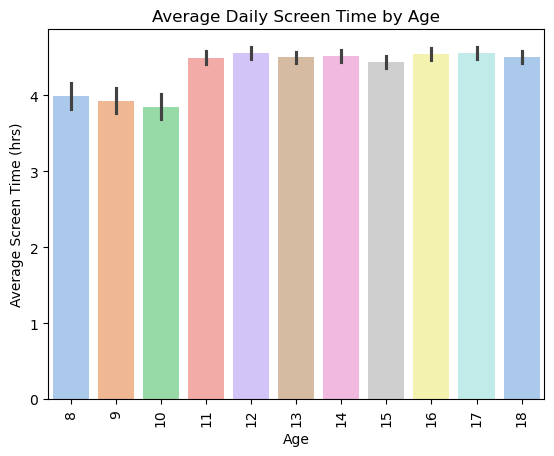

In [8]:
#We'll do Data Visualization till now we performed basic Analysis 
# 1. Average Screen Time by Age
sns.barplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=kids, palette='pastel')
plt.title('Average Daily Screen Time by Age')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hrs)')
plt.xticks(rotation=90)
plt.show()

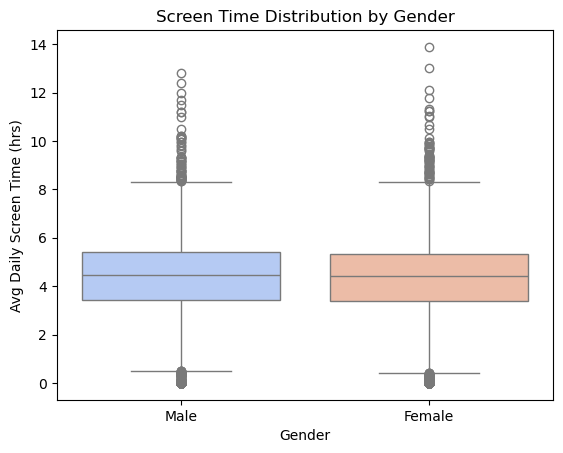

In [9]:
# 2. Screen Time Distribution by Gender
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=kids, palette='coolwarm')
plt.title('Screen Time Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.show()

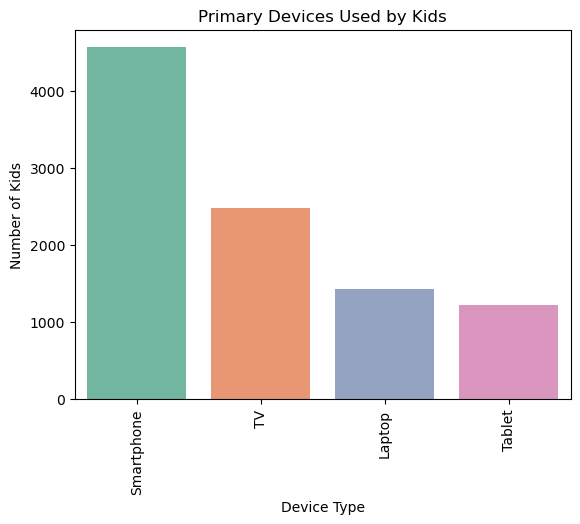

In [10]:
# 3. Primary Device Usage
sns.countplot(data=kids, x='Primary_Device', order=kids['Primary_Device'].value_counts().index, palette='Set2')
plt.title('Primary Devices Used by Kids')
plt.xlabel('Device Type')
plt.ylabel('Number of Kids')
plt.xticks(rotation=90)
plt.show()

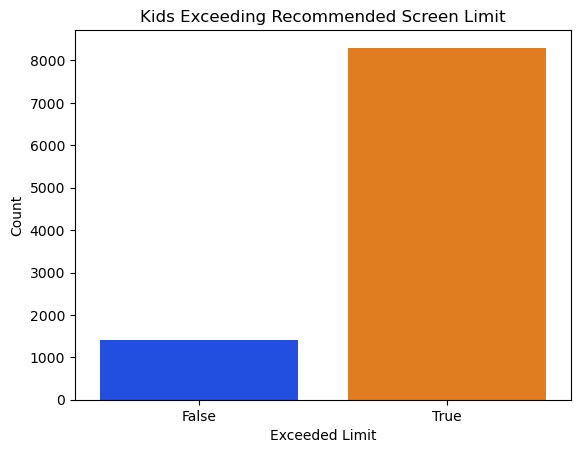

In [11]:
# 4. Exceeded Recommended Screen Limit (Yes/No)
sns.countplot(data=kids, x='Exceeded_Recommended_Limit', palette='bright')
plt.title('Kids Exceeding Recommended Screen Limit')
plt.xlabel('Exceeded Limit')
plt.ylabel('Count')
plt.show()

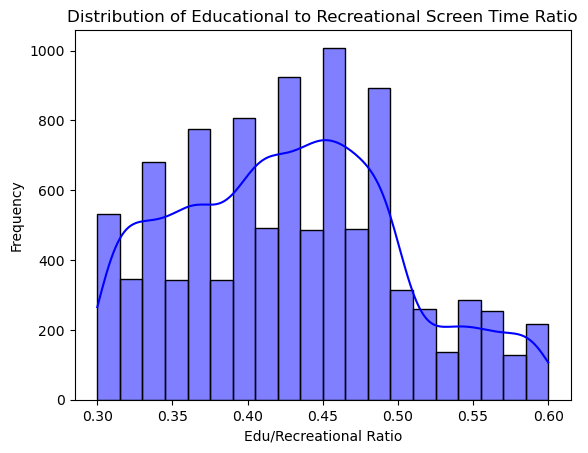

In [12]:
# 5. Educational vs Recreational Usage (Ratio)
sns.histplot(kids['Educational_to_Recreational_Ratio'], kde=True, bins=20, color='blue')
plt.title('Distribution of Educational to Recreational Screen Time Ratio')
plt.xlabel('Edu/Recreational Ratio')
plt.ylabel('Frequency')
plt.show()

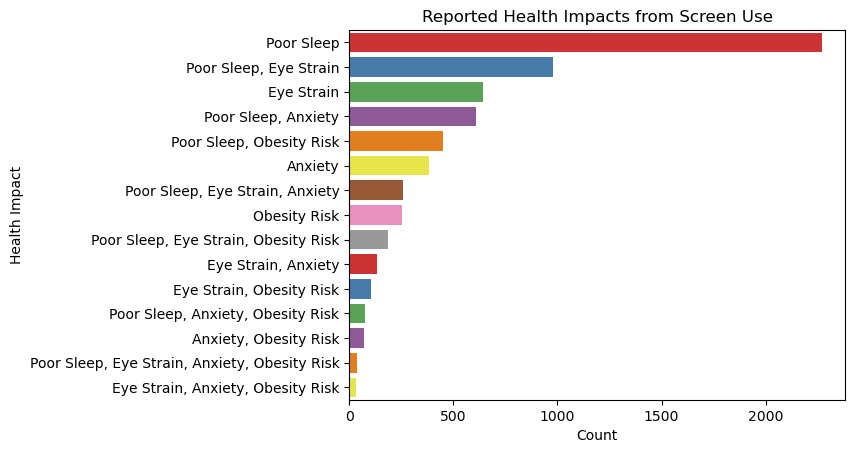

In [13]:
# 6. Health Impacts Distribution
sns.countplot(y='Health_Impacts', data=kids, order=kids['Health_Impacts'].value_counts().index, palette='Set1')
plt.title('Reported Health Impacts from Screen Use')
plt.xlabel('Count')
plt.ylabel('Health Impact')
plt.show()

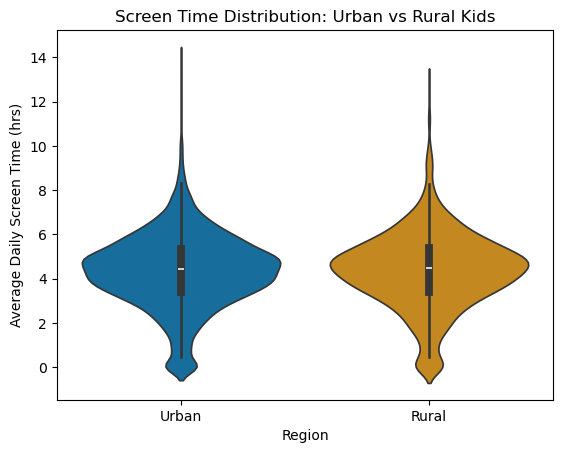

In [14]:
# 7. Urban vs Rural Screen Time Comparison
sns.violinplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=kids, palette='colorblind')
plt.title('Screen Time Distribution: Urban vs Rural Kids')
plt.xlabel('Region')
plt.ylabel('Average Daily Screen Time (hrs)')
plt.show()

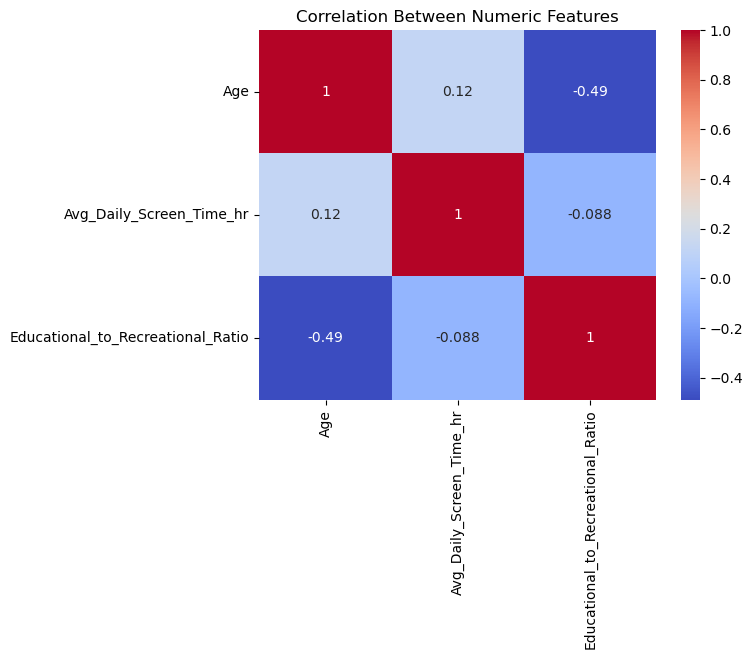

In [15]:
# 8. Heatmap: Correlation Matrix
corr = kids[['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


In [16]:
#Conclusion from the above visualization is given below
#1.Kids who's age is 12,16,17 has more Average Daily Screen Time from rest of kids.
#2.By Gender distribution number of male has more Average Daily Screentime than number of female.
#3.The most frequently used device by kids is Smartphone.
#4.More than 80% of kids are exceeding the recommended screentime.
#5.Ratio of time spent on educational vs. recreational screen content.
#6.Most of kids suffering from poor sleep and eye strain problem due to excessive screentime.
#7.Urban kids has more screentime compare to Rural kids.
#8.Age has a noticeable negative correlation with the educational-to-recreational ratio.The other correlations are weak, meaning screen time alone doesn’t strongly explain educational vs recreational usage.